In [12]:
from automate import *

In [13]:
df = pd.read_csv('peptide-detail-ci_filtered_aligned_merged.csv')
df["Amino Acids 1"] = df["Amino Acids"].apply(lambda x: x.split(",")[0])
df

,CDR3,CDR3_al,tokenized_smiles,TCR BioIdentity,TCR Nucleotide Sequence,Experiment,ORF Coverage,Amino Acids,Start Index in Genome,End Index in Genome,v_gene,j_gene,Amino Acids 1
0,CASSAQGTGDRGYTF,CASSA-----QGTGDRGYTF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 27, 13]",CASSAQGTGDRGYTF+TCRBV27-01+TCRBJ01-02,GAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCA...,eAV93,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV27-01,TCRBJ01-02,ADAGFIKQY
1,CASSLVATGNTGELFF,CASSL----VATGNTGELFF,"[12, 16, 34, 34, 31, 31, 31, 31, 23, 27, 27, 13]",CASSLVATGNTGELFF+TCRBV07-09+TCRBJ02-02,CGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCAGCAGCT...,eOX56,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV07-09,TCRBJ02-02,ADAGFIKQY
2,CALKVGADTQYF,CALKV--------GADTQYF,"[12, 16, 31, 31, 31, 31, 31, 31, 31, 31, 27, 13]",CALKVGADTQYF+TCRBV30-01+TCRBJ02-03,CTGAGTTCTAAGAAGCTCCTTCTCAGTGACTCTGGCTTCTATCTCT...,eQD124,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV30-01,TCRBJ02-03,ADAGFIKQY
3,CASSLWASGRGGTGELFF,CASSLW--ASGRGGTGELFF,"[12, 16, 34, 34, 31, 31, 34, 27, 27, 13]",CASSLWASGRGGTGELFF+TCRBV27-01+TCRBJ02-02,AGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCAGTTTATGGG...,eAV93,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV27-01,TCRBJ02-02,ADAGFIKQY
4,CASSLLGWEQLDEQFF,CASSL----LGWEQLDEQFF,"[12, 16, 34, 34, 31, 31, 31, 31, 27, 27, 13]",CASSLLGWEQLDEQFF+TCRBV27-01+TCRBJ02-01,TCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCAGTT...,eMR16,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV27-01,TCRBJ02-01,ADAGFIKQY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
236340,CASSSGPQETQYF,CASSS-------GPQETQYF,"[12, 16, 34, 34, 34, 31, 31, 31, 31, 31, 31, 3...",CASSSGPQETQYF+TCRBV07-09+TCRBJ02-05,GAGATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTG...,eAV88,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV07-09,TCRBJ02-05,AQVDVVNFNL
236341,CASSKRDSQETQYF,CASSK------RDSQETQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSKRDSQETQYF+TCRBV07-09+TCRBJ02-05,ATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCA...,eDH105,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV07-09,TCRBJ02-05,AQVDVVNFNL
236342,CASSQLPGQGKVQYF,CASSQ-----LPGQGKVQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 45, 27, 13]",CASSQLPGQGKVQYF+TCRBV04-01+TCRBJ02-07,CACGCCCTGCAGCCAGAAGACTCAGCCCTGTATCTCTGCGCCAGCA...,eAV93,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV04-01,TCRBJ02-07,AQVDVVNFNL
236343,CASSPGDNEQFF,CASSP--------GDNEQFF,"[12, 16, 34, 34, 45, 31, 31, 31, 31, 31, 31, 3...",CASSPGDNEQFF+TCRBV09-01+TCRBJ02-01,CTAAACCTGAGCTCTCTGGAGCTGGGGGACTCAGCTTTGTATTTCT...,eEE224,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV09-01,TCRBJ02-01,AQVDVVNFNL


In [14]:
rootf = "." ## place here the folder where you save all the folders of the git ##

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = ['Garuda']
mpl.rcParams['font.serif'] = ['Garuda-Oblique']

curr_float = np.float32
curr_int = np.int16

def convert_number(seqs): # convert to numbers already aligned seqs
    aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V',  'W', 'Y','-']
    aadict = {aa[k]: k for k in range(len(aa))}
    msa_num = np.array(list(map(lambda x: [aadict[y] for y in x], seqs[0:])), dtype=curr_int, order="c")
    
    return msa_num

def convert_letter(seqs_n): # convert to numbers already aligned seqs
    aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V',  'W', 'Y','-']
    aadictinv = {k: aa[k] for k in range(len(aa))} 
    seqs=[]
    if type(seqs_n[0]) == curr_int:
        seqs.append(''.join([aadictinv[e] for e in seqs_n]))
    else:
        for t in range(len(seqs_n)):
            seqs.append(''.join([aadictinv[e] for e in seqs_n[t]]))
    return seqs

def uniqueIndexes(l):
    seen = set()
    res = []
    for i, n in enumerate(l):
        if n not in seen:
            res.append(i)
            seen.add(n)
    return res

#%matplotlib inline
import sys, os, pickle
sys.path.append(rootf + '/PGM/source/')
sys.path.append(rootf + '/PGM/utilities/')
sys.path.append(rootf + '/Align_utils/')
import rbm,utilities
import Proteins_utils, RBM_utils, utilities, sequence_logo, plots_utils

./PGM/source\numba_utilities.py:1124: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  dmean_v_dw = np.dot(s1.T, V)
./PGM/source\numba_utilities.py:1125: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  dvar_e_dw = np.dot(s2.T, V)
./PGM/source\numba_utilities.py:1126: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  tmp3 = np.dot(s3.T, V)
./PGM/source\numba_utilities.py:961: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 1d, A), array(float32, 2d, A))
  mean_V = np.dot(weights, V) / sum_weights


In [15]:
data = df[:100000]
data

,CDR3,CDR3_al,tokenized_smiles,TCR BioIdentity,TCR Nucleotide Sequence,Experiment,ORF Coverage,Amino Acids,Start Index in Genome,End Index in Genome,v_gene,j_gene,Amino Acids 1
0,CASSAQGTGDRGYTF,CASSA-----QGTGDRGYTF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 27, 13]",CASSAQGTGDRGYTF+TCRBV27-01+TCRBJ01-02,GAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCA...,eAV93,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV27-01,TCRBJ01-02,ADAGFIKQY
1,CASSLVATGNTGELFF,CASSL----VATGNTGELFF,"[12, 16, 34, 34, 31, 31, 31, 31, 23, 27, 27, 13]",CASSLVATGNTGELFF+TCRBV07-09+TCRBJ02-02,CGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCAGCAGCT...,eOX56,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV07-09,TCRBJ02-02,ADAGFIKQY
2,CALKVGADTQYF,CALKV--------GADTQYF,"[12, 16, 31, 31, 31, 31, 31, 31, 31, 31, 27, 13]",CALKVGADTQYF+TCRBV30-01+TCRBJ02-03,CTGAGTTCTAAGAAGCTCCTTCTCAGTGACTCTGGCTTCTATCTCT...,eQD124,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV30-01,TCRBJ02-03,ADAGFIKQY
3,CASSLWASGRGGTGELFF,CASSLW--ASGRGGTGELFF,"[12, 16, 34, 34, 31, 31, 34, 27, 27, 13]",CASSLWASGRGGTGELFF+TCRBV27-01+TCRBJ02-02,AGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCAGTTTATGGG...,eAV93,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV27-01,TCRBJ02-02,ADAGFIKQY
4,CASSLLGWEQLDEQFF,CASSL----LGWEQLDEQFF,"[12, 16, 34, 34, 31, 31, 31, 31, 27, 27, 13]",CASSLLGWEQLDEQFF+TCRBV27-01+TCRBJ02-01,TCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCAGTT...,eMR16,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV27-01,TCRBJ02-01,ADAGFIKQY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CSASQGTYEQYF,CSASQ--------GTYEQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 31, 3...",CSASQGTYEQYF+TCRBV20-01+TCRBJ02-07,CTGACAGTGACCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCT...,eEE240,ORF1ab,"TMADLVYAL,YTMADLVYA",13805,13834,TCRBV20-01,TCRBJ02-07,TMADLVYAL
99996,CSVEDPQVTNEQFF,CSVED------PQVTNEQFF,"[12, 16, 34, 31, 31, 31, 31, 31, 31, 45, 23, 2...",CSVEDPQVTNEQFF+TCRBV29-01+TCRBJ02-01,GTGAGCAACATGAGCCCTGAAGACAGCAGCATATATCTCTGCAGCG...,eEE243,ORF1ab,"TMADLVYAL,YTMADLVYA",13805,13834,TCRBV29-01,TCRBJ02-01,TMADLVYAL
99997,CASSTSGKGEKLFF,CASST------SGKGEKLFF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSTSGKGEKLFF+TCRBV18-01+TCRBJ01-04,ATCCAGCAGGTAGTGCGAGGAGATTCGGCAGCTTATTTCTGTGCCA...,eAV93,ORF1ab,"TMADLVYAL,YTMADLVYA",13805,13834,TCRBV18-01,TCRBJ01-04,TMADLVYAL
99998,CSASLGLYEQYF,CSASL--------GLYEQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 31, 3...",CSASLGLYEQYF+TCRBV20-X+TCRBJ02-07,CTGACAGTGACCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCT...,eAV88,ORF1ab,"TMADLVYAL,YTMADLVYA",13805,13834,TCRBV20-X,TCRBJ02-07,TMADLVYAL


In [39]:
pwm_top

array([[0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.94, 0.02, 0.04, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.02, 0.02, 0.94, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.04, 0.  , 0.  , 0.76, 0.08, 0.1 , 0.  ],
       [0.02, 0.  , 0.02, 0.02, 0.  , 0.16, 0.02, 0.06, 0.  , 0.1 , 0.  ,
        0.  , 0.12, 0.06, 0.1 , 0.04, 0.12, 0.08, 0.  , 0.04, 0.04],
       [0.02, 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.02, 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.94],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],

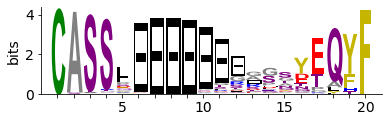

In [40]:
## Visualize logo of clones with top response score ##
ll_rel = data["CDR3_al"]
val_seqs = list((data['CDR3_al'].values))
val_seqs_n = convert_number(val_seqs)
s2=16
ntop = 50

pwm_top = utilities.average(val_seqs_n, c=21)
fig = sequence_logo.Sequence_logo(pwm_top, figsize=(5.5,1.8), ylabel = 'bits', ticks_every=5, ticks_labels_size=s2-2,title_size=s2-2)

In [38]:
data["CDR3_al"].apply(lambda x: x[2]).value_counts()

S    96324
T     1466
V     1195
I      383
A      255
W      164
G       66
R       39
L       31
N       16
P       15
C       11
D        9
E        6
Q        4
F        4
M        4
Y        3
H        3
K        2
Name: CDR3_al, dtype: int64

In [1]:
import numpy as np
import pandas as pd
import pyrepseq as rs
import pyrepseq.plotting as rsp
import matplotlib.pyplot as plt

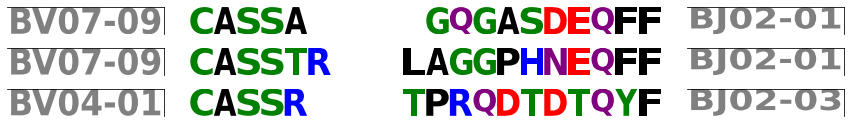

In [37]:
import random 
N = 3
idx = random.sample(range(1, 100), N)
fig, axes = plt.subplots(ncols=N, nrows=3, sharey=True, figsize=(15, 2),
                         gridspec_kw=dict(width_ratios=(1, 3, 1),
                                          wspace=0.1, hspace=0.5)
                         )
for row, i in enumerate(idx):
    rsp.seqlogos_vj(data.iloc[i:i+1], "CDR3_al", 'v_gene', 'j_gene', axes=axes[row, :3])

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

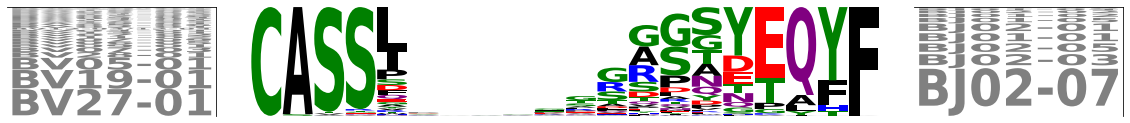

In [25]:
fig, axes = plt.subplots(ncols=3, nrows=1, sharey=True, figsize=(20, 2),
                         gridspec_kw=dict(width_ratios=(1, 3, 1),
                                          wspace=0.1, hspace=0.5)
                         )
rsp.seqlogos_vj(data, "CDR3_al",'v_gene','j_gene',axes=axes[:3])